<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de regresión lineal simple

Para implementar se tomaron en cuenta las ecuaciones para calcular la intersección con el eje $y$ ($a_0$) así como la pendiente ($a_1$) de la recta de regresión el libro de Estadística de Triola (Triola, 2004).

$a_0 = \frac{n(\sum{xy}-(\sum{x})(\sum{y}))}{n(\sum{x^2})-(\sum{x})^2}$

$a_1 = \frac{n(\sum{y})(\sum{x^2})-(\sum{x})(\sum{xy})}{n(\sum{x^2})-(\sum{x})^2}$

###Instrucciones de uso

Triola, M. F. (2004). Probabilidad y estadística. Pearson educación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

El archivo .csv que se utilizó para las pruebas se adjunta al presente notebook. Solo se utilizaron 5 registros (puntos), sin embargo, puede ingresarse cualquier cantidad de registros sin problema al mismo documento.

Se usa la librería Pandas para convertir el archivo .cvs con los puntos y de esta manera poder manipular los datos con mayor comodidad. Se pudo haber construído el conjunto de puntos, aleatoriamente, en dos arreglos o en una matriz, sin embargo, como el objetivo de la presente implementación es tener una herramienta que se pueda usar en un futuro para proyectos reales, lo más cómodo es obtener los datos de una base de datos, o bien de un archvo .csv Esta es la principal razón de usar dataframes.

In [2]:
#Se lee el documento y se convierte a un dataframe y se visualizan los primeros puntos
data=pd.read_csv("datos_prueba.csv")
data.head()

,x,y
0,1,0.5
1,2,2.5
2,3,2.0
3,4,4.0
4,5,3.5


Ahora se grafican los puntos y se tiene un primer vistazo de la distribución de los puntos, a partir de esta se puede tener una idea de si es conveniente usar una regresión lineal u obtener las predicciones con otro método. 

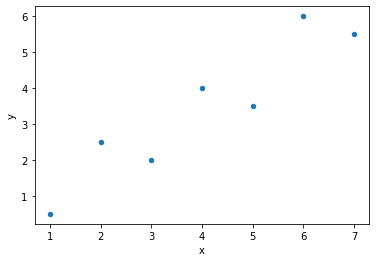

In [3]:
graf=data.plot("x","y", kind="scatter")
plt.show()

In [4]:
x=data['x'].tolist()
y=data['y'].tolist()

In [5]:
#Implementación para obtener la pendiente de la recta
def calcular_a1(n,sum_xy,sum_x,sum_y,sum_x_cuad,sum_x_al_cuad):
  a=0
  num = (n*sum_xy)-sum_x*sum_y
  den = (n*sum_x_cuad)-sum_x_al_cuad
  a = num/den
  return a

In [6]:
#Implementación para obtener la intersección con el eje y
def calcular_a0(n,sum_y, sum_x, a1):
  a0=(sum_y/n)-((sum_x/n)*a1)
  return a0

In [7]:
sum_x=sum(data['x'])
sum_y=sum(data['y'])
sum_xy=0
mul_xy = []
x_cuad=[]
sum_x_cuad=0
for i in range(len(data['x'])):
  mul=data['x'][i]*data['y'][i]
  cuad=data['x'][i]*data['x'][i]
  mul_xy.append(mul)
  x_cuad.append(cuad)
  sum_xy=sum_xy+mul
  sum_x_cuad=sum_x_cuad+cuad
  

sum_x_al_cuad = sum_x*sum_x
data['x*y'] = mul_xy
data['x^2'] = x_cuad
print(data.head())
x_prom = sum_x/len(data['x'])
y_prom = sum_y/len(data['x'])
print("Sumatoria de x= {}".format(sum_x))
print("Sumatoria de y= {}".format(sum_y))
print("Sumatoria de x*y= {}".format(sum_xy))
print("Sumatoria de x^2= {}".format(sum_x_cuad))
print("Sumatoria de x_i^2= {}".format(sum_x_al_cuad))

a1=calcular_a1(len(data['x']),sum_xy,sum_x, sum_y,sum_x_cuad,sum_x_al_cuad)
a0=calcular_a0(len(data['x']),sum_y,sum_x,a1)
print("El valor de la pendiente= {}".format(a1))
print("El valor del término independiente= {}".format(a0))
print("La ecuación de la recta de regresión es y = {} + {} x".format(a0,a1))

   x    y   x*y  x^2
0  1  0.5   0.5    1
1  2  2.5   5.0    4
2  3  2.0   6.0    9
3  4  4.0  16.0   16
4  5  3.5  17.5   25
Sumatoria de x= 28
Sumatoria de y= 24.0
Sumatoria de x*y= 119.5
Sumatoria de x^2= 140
Sumatoria de x_i^2= 784
El valor de la pendiente= 0.8392857142857143
El valor del término independiente= 0.07142857142857117
La ecuación de la recta de regresión es y = 0.07142857142857117 + 0.8392857142857143 x


Ahora se puede utilizar la ecuación obtenida para predecir los valores de y

In [8]:
def f(x,a0,a1):
  y = a0+a1*x
  return y

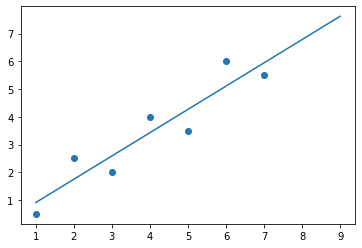

In [9]:
#Graficando la recta de regresión
x_s=range(1,10)
fig, ax = plt.subplots()
ax.scatter(data['x'],data['y'])
ax.plot(x_s,[f(i,a0,a1) for i in x_s])
plt.show()

In [10]:
#Obtener la predicción cuando x = 7
x=7
y_pred = f(x,a0,a1)
print("El valor de la predicción es y = {}".format(y_pred))

El valor de la predicción es y = 5.946428571428571
